In [1]:
import sys
sys.path.append('../src/')

In [2]:
import json
from helpers import get_tile_colouring, load_words
best_word = "salet"
with open('../data/decision_tree.json', 'r') as f:
        word_states = json.load(f)

answers = load_words("../data/allowed_answers.txt")


In [3]:
def recursion_solve(word_states, answer, depth=0):
    if "next states" in word_states and "ggggg" in word_states['next states'] and word_states['next states']["ggggg"] == answer:
        return depth
    elif "next states" in word_states:
        best_word = word_states['best word']
        colouring = get_tile_colouring(best_word, answer)
        if colouring in word_states['next states']:
            child = word_states['next states'][colouring]
            return recursion_solve(child, answer, depth + 1)
    return float('inf')

Avg Guesses to solve 3.4211663066954645


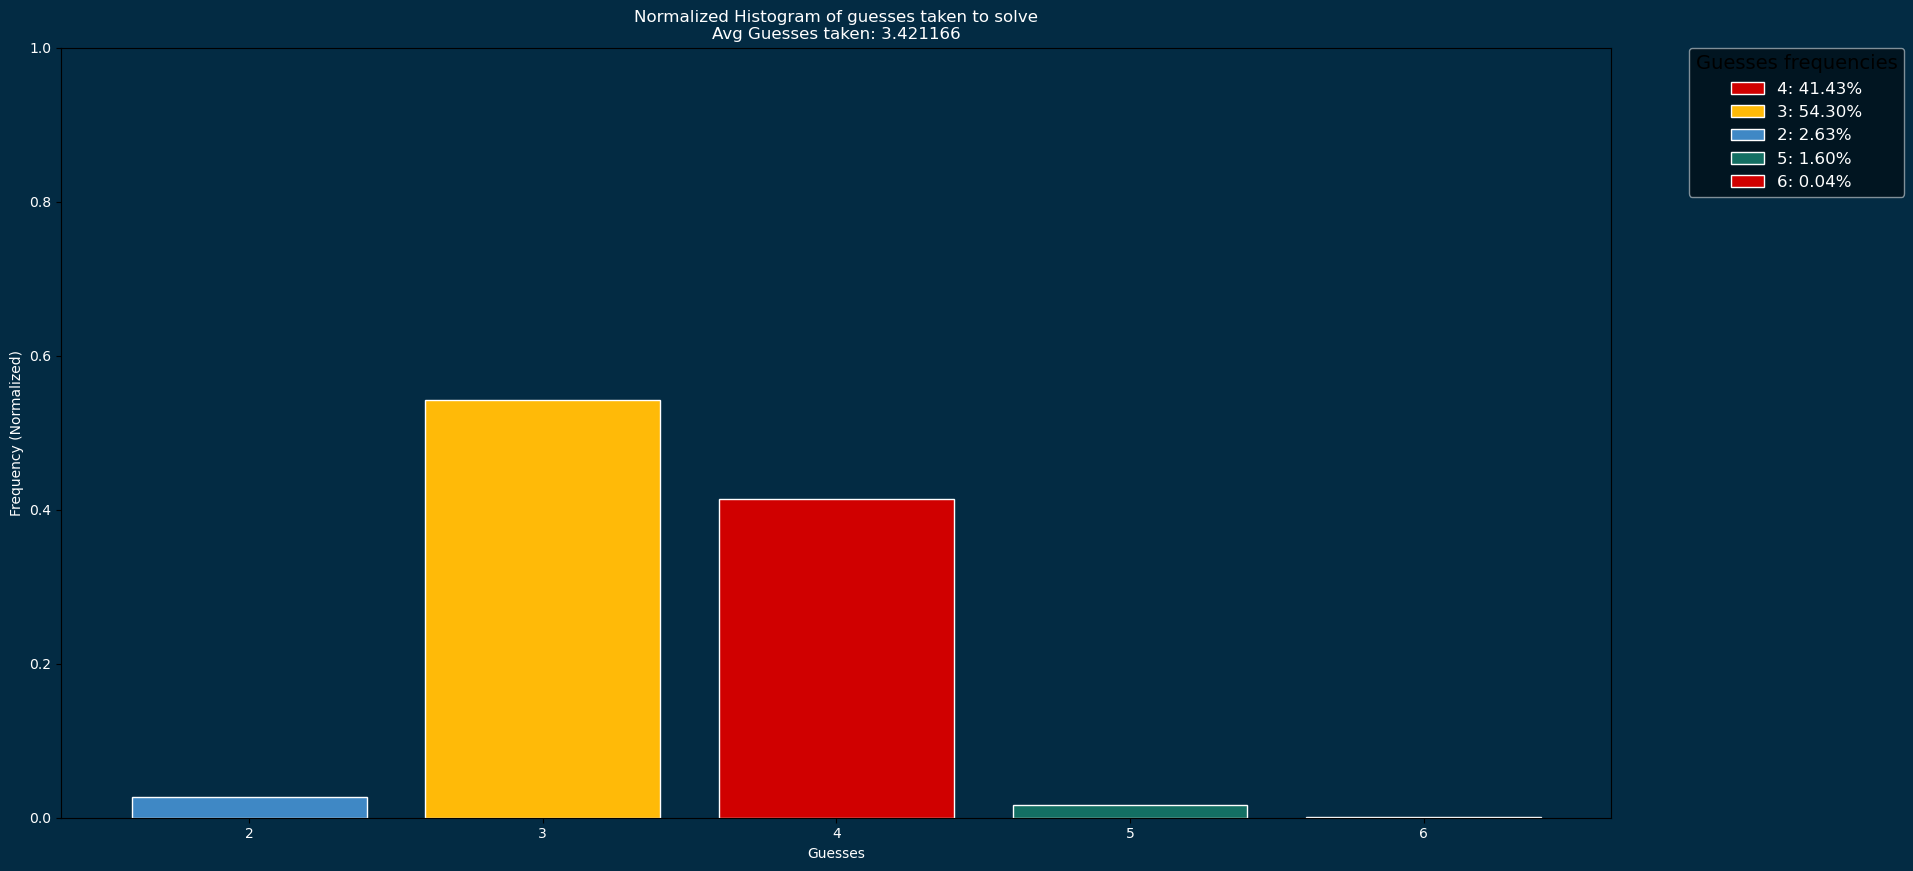

In [7]:
import matplotlib.pyplot as plt

# Initialize scored dictionary and total guesses counter
scores = {}
total_guesses = 0

# Calculate scores and total guesses
for answer in answers:
    res = recursion_solve(word_states, answer, depth=1)
    total_guesses += res
    scores[res] = scores.get(res, 0) + 1

# Calculate the average number of guesses
avg_guesses = total_guesses / len(answers)
print(f"Avg Guesses to solve {avg_guesses}")

# Normalize frequencies to be between 0 and 1
normalized_scores = {key: value / len(answers) for key, value in scores.items()}

# Get the list of scores and their normalized frequencies
scores_list = list(normalized_scores.keys())
frequencies = list(normalized_scores.values())

# Custom colors for the bars
custom_colors = ['#d00000', '#ffba08', '#3f88c5', '#136f63']

# Apply dark mode style with custom background color
plt.figure(figsize=(20, 10), facecolor='#032b43')
ax = plt.gca()
ax.set_facecolor('#032b43')

# Plot the bar chart
bars = plt.bar(scores_list, frequencies, color=custom_colors[:len(scores_list)], edgecolor='white')

plt.xlabel('Guesses', color='white')
plt.ylabel('Frequency (Normalized)', color='white')
plt.title(f'Normalized Histogram of guesses taken to solve\nAvg Guesses taken: {avg_guesses:.7}', color='white')
plt.xticks(scores_list, color='white')
plt.yticks(color='white')
plt.ylim(0, 1)

# Create a legend
legend_labels = [f'{score}: {frequency:.2%}' for score, frequency in zip(scores_list, frequencies)]
plt.legend(bars, legend_labels, title='Guesses frequencies', bbox_to_anchor=(1.05, 1), loc='upper left', facecolor='black', edgecolor='white', title_fontsize='14', labelcolor='white', fontsize=12, framealpha=0.5, borderaxespad=0.)

# Show the plot
plt.show()
